# **LOGISTIC DISCRIMINATION**

In **logistic discrimination** the logarithm of the **likelihood ratios** is
modeled via linear functions. That is,
$$\ln \frac{P(\omega_i | \textbf{x})}{P(\omega_M | \textbf{x})} = \textbf{w}_i^T \textbf{x}+w_{i,0}, \qquad i=1,\ldots, M-1$$
In the denominator,any class other than $\omega_M$ can also be used.


The unknown parameters, $w_{i,0}$, $\textbf{w}_i, \ i=1,\ldots,M-1$, must be chosen to ensure that probabilities add
to one:
$$\sum_{i=1}^M P(\omega_i|\textbf{x})=1$$

 Let
$$z_i = g_{i}(\textbf{x})=w_{i,0}+\textbf{w}_i^T \textbf{x} $$
So, combining both equations, it is straightforward to see that this type of linear modeling is equivalent to an exponential modeling of the *a posteriori* probabilities.
$$
P(\omega_M | \textbf{x}) = \frac{1}{1+\sum_{j=1}^{M-1}\exp(w_{j,0}+\textbf{w}_j^T \textbf{x})}=\frac{1}{1+\sum_{j=1}^{M-1}\exp(z_j)}\\
P(\omega_i | \textbf{x}) = \frac{\exp(w_{i,0}+\textbf{w}_i^T \textbf{x})}{1+\sum_{j=1}^{M-1}\exp(w_{j,0}+\textbf{w}_j^T \textbf{x})} = \frac{\exp(z_i)}{1+\sum_{j=1}^{M-1}\exp(z_j)}, \qquad i=1,2,\ldots,M-1
$$

For the two-class case, the previous equation are simplified to



$$
P(\omega_2|\textbf{x}) = \frac{1}{1+\exp(w_0+\textbf{w}^T\textbf{x})}=\frac{1}{1+\exp(g(\textbf{x}))}\\
P(\omega_1|\textbf{x}) = \frac{\exp(w_0+\textbf{w}^T\textbf{x})}{1+\exp(w_0+\textbf{w}^T\textbf{x})}=\frac{\exp(g(\textbf{x}))}{1+\exp(g(\textbf{x}))}\\
$$

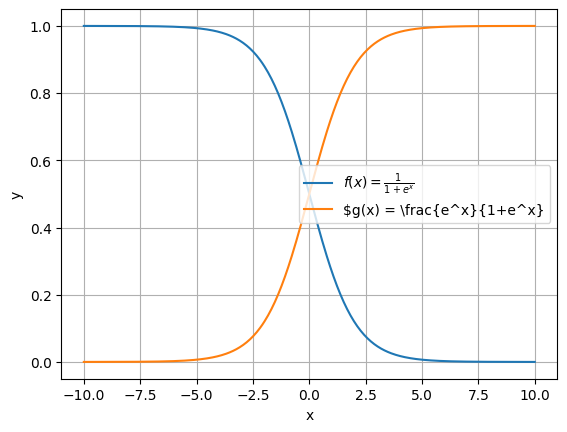

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
f = 1 / (1 + np.exp(x))
g = np.exp(x) / (1 + np.exp(x))

plt.plot(x, f, label=r'$f(x) = \frac{1}{1+e^x}$')
plt.plot(x, g, label=r'$g(x) = \frac{e^x}{1+e^x}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Note that $$\frac{e^x}{1+e^x} = \frac{1}{1+e^{-1}}$$

To estimate the set of the unknown parameters, $\textbf{w}_i, w_{i,0}$, a **maximum likelihood approach** is usually employed.

## **Parameter estimation**

Optimization is performed with respect to all parameters, which we can think of as the components of a parameter vector $\theta$.

Let $\textbf{x}_k, k=1,2,\ldots,N$, be the training feature vectors with known class labels. Let us denote by $\textbf{x}_k^{(m)}, \ k=1,\ldots,N_m$, the vectors originating from class $m=1,2,\ldots,M$. Obviously, $\sum_m N_m=N$.

The **log-likelihood function to be optimized is given by

$$L(\theta) = \ln \left\{\prod_{k=1}^{N_1} p\left(\textbf{x}_k^{(1)}|\omega_1; \theta \right)\prod_{k=1}^{N_2} p\left(\textbf{x}_k^{(2)}|\omega_2; \theta \right)\ldots \prod_{k=1}^{N_M} p\left(\textbf{x}_k^{(M)}|\omega_M; \theta \right) \right\}$$

Taking into account the **Bayes theorem**

$$p\left(\textbf{x}_k^{(m)}|\omega_m; \theta \right) =\frac{p(x_k^{(m)})P(\omega_m|x_k^{(m)}; \theta)}{P(\omega_m)}$$

the log-likelihood $L(\theta)$ becomes

$$L(\theta) = \sum_{k=1}^{N_1} \ln P(\omega_1|\textbf{x}_k^{(1)})+\sum_{k=1}^{N_2} \ln P(\omega_2|\textbf{x}_k^{(2)})+\ldots+\sum_{k=1}^{N_M} \ln P(\omega_M|\textbf{x}_k^{(M)})+C$$

where the explicit dependence on $\theta$ has been suppressed for notational simplicity and $C$ is a parameter independent on $\theta$ equal to
$$C=\ln \frac{\prod_{k=1}^N p(\textbf{x}_k)}{\prod_{m=1}^M p(\omega_m)^{N_m}}$$

To find the best parameters $\theta$ any optimization algorithm can then be used to perform the required maximization.

## Visualization

In [2]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
# DataSets
def Iris(columns=None, replace=False):
  df = load_iris()
  data = pd.DataFrame(df["data"], columns=df["feature_names"])
  data["target"] = df["target"]
  if columns == None:
    columns = data.columns
  samples = data[columns].values
  if replace:
    data['target'] = data['target'].replace(2, 1)
  return samples, data

In [4]:
samples, data = Iris(columns=None, replace=True)
var_x, var_y = ("sepal length (cm)", "petal length (cm)")
X = np.stack([data[var_x], data[var_y]], axis=1)
y = 1-data["target"]

In [5]:
W = np.array([[-0.50621636], [1.43113825]])
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

In [6]:
xx0, xx1 = np.meshgrid(X0,X1)
Z = W[0] * xx0 + W[1] * xx1
A = 1 / (1 + np.exp(Z))

In [ ]:
fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='haline', opacity = 0.7)]))

fig.add_scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers',
                  marker=dict(size=5, color=y, colorscale='haline',opacity=0.9))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
samples, data = Iris(columns=None, replace=False)
var_x, var_y = ("sepal length (cm)", "petal length (cm)")
X = np.stack([data[var_x], data[var_y]], axis=1)
y = 1-data["target"]

In [10]:
logreg = LogisticRegression(max_iter=100, verbose=1)
logreg.fit(X, y)

LogisticRegression(verbose=1)

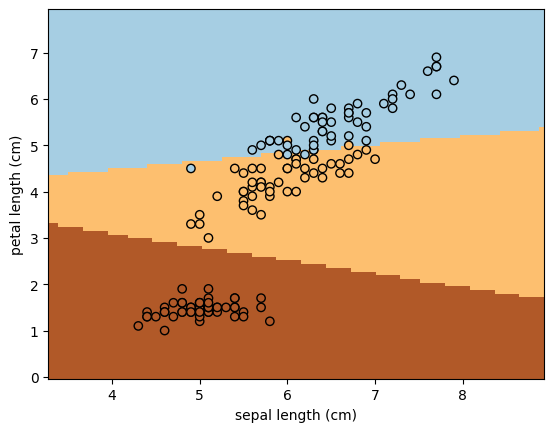

In [11]:
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(logreg, X,
                                       cmap=plt.cm.Paired, ax=ax,
                                       response_method="predict",
                                       plot_method="pcolormesh",
                                       xlabel=var_x, ylabel=var_y)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)